## Arbol elemental con libreria  rpart

Debe tener instaladas las librerias  data.table  ,  rpart   y rpart.plot

In [47]:
#cargo las librerias que necesito
require("data.table")
require("rpart")
require("rpart.plot")

Aqui se debe poner la carpeta de SU computadora local

In [48]:
setwd("C:\\Lab_Imp_1\\GIT\\labo\\")  #Establezco el Working Directory

cargo el dataset

In [49]:
dataset  <- fread("C:\\Lab_Imp_1\\datasets\\dataset_pequeno.csv")

defino donde entreno y donde aplico el modelo

In [50]:
dtrain  <- dataset[ foto_mes==202107 ]  #defino donde voy a entrenar
dapply  <- dataset[ foto_mes==202109 ]  #defino donde voy a aplicar el modelo

genero el modelo,  aqui se construye el arbol

In [51]:
modelo  <- rpart(formula=    "clase_ternaria ~ .", #quiero predecir clase_ternaria a partir de el resto de las variables
                 data =      dtrain,  #los datos donde voy a entrenar
                 xval=       0,
                 cp=        -0.3, #esto significa no limitar la complejidad de los splits
                 minsplit=   1025,   #minima cantidad de registros para que se haga el split
                 minbucket=  10,   #tamaño minimo de una hoja
                 maxdepth=   8 )  #PRUEBO  una profundidad de 10

Ahora grafico el arbol, va a ser muy frondoso porque la profundidad es de 10

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


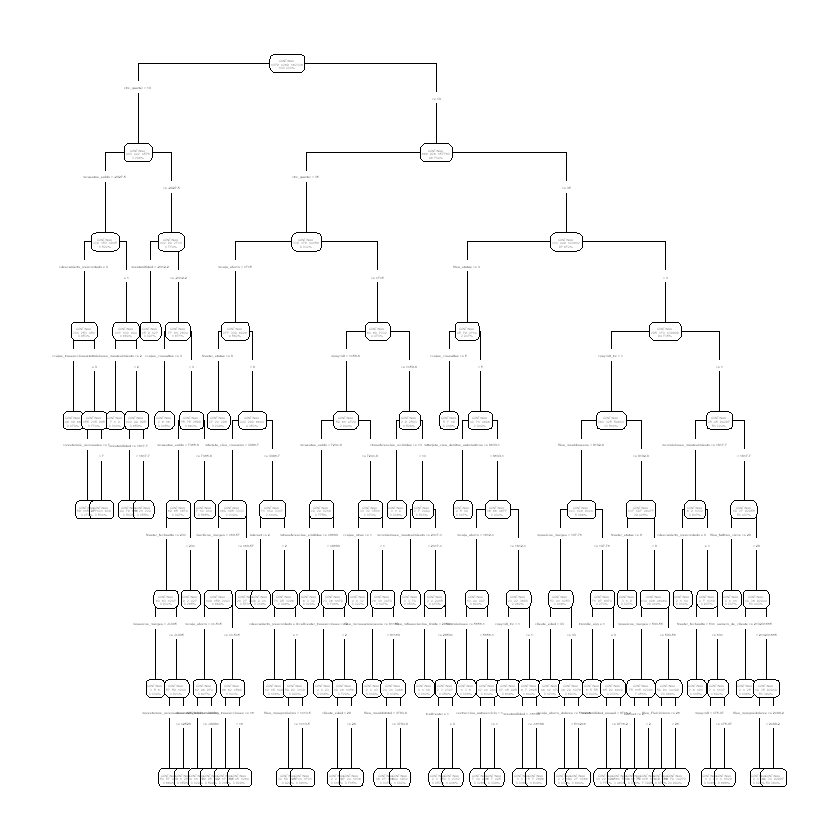

In [52]:
prp(modelo, extra=101, digits=-5, branch=1, type=4, varlen=0, faclen=0)

Ahora aplico al modelo  a los datos muevos  y genero la salida para kaggle

aplico el modelo a los datos nuevos

In [53]:
prediccion  <- predict( modelo, dapply , type = "prob") #aplico el modelo

prediccion es una matriz con TRES columnas, llamadas "BAJA+1", "BAJA+2"  y "CONTINUA"
cada columna es el vector de probabilidades 

agrego a dapply una columna nueva que es la probabilidad de BAJA+2

In [54]:
dapply[ , prob_baja2 := prediccion[, "BAJA+2"] ]

solo le envio estimulo a los registros con probabilidad de BAJA+2 mayor  a  1/40

In [55]:
dapply[ , Predicted  := as.numeric(prob_baja2 > 1/35) ]

Finalmente genero el archivo para Kaggle

creo la carpeta donde va el experimento

In [57]:
dir.create( "./exp/KA2002" ) 

Warning message in dir.create("./exp/KA2002"):
"'.\exp\KA2002' already exists"


grabo el dataset

In [58]:
fwrite( dapply[ , list(numero_de_cliente, Predicted) ], #solo los campos para Kaggle
        file= "./exp/KA2002/KA2002_009.csv", 
        sep= "," )